In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NUM_CLASSES = 10

In [3]:
def prepare_data(path):
    data = pd.read_csv(path)
    
    y = np.array(data["label"])
    
    X = data.drop(labels=["label"], axis=1)
    X_normalized = np.array(X / 255.0)

    zeros = np.zeros((y.size, NUM_CLASSES))
    zeros[np.arange(y.size), y] = 1

    return X_normalized, zeros
    

In [4]:
X_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
y_train = X_train.label
X_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
# y_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [5]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

y_train = train["label"]
zeros = np.zeros((y_train.size, NUM_CLASSES))
zeros[np.arange(y_train.size), y_train] = 1
y_train = zeros

X_train = train.drop(labels=["label"], axis=1)
X_train = np.array(X_train / 255.0)

X_test = np.array(test / 255.0)

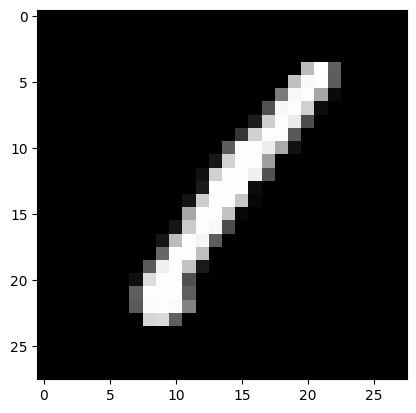

In [6]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')

In [7]:
class DeepNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights
        self.W1 = self.xavier_glorot_initialization(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = self.xavier_glorot_initialization(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

        self.loss_history = []
        self.accuracy_history = []

    
    def xavier_glorot_initialization(self, fan_in, fan_out):
        """Initializes weights with Xavier/Glorot initialization"""
        fan_avg = (fan_in + fan_out) / 2
        variance = 1 / fan_avg
        limit = np.sqrt(3 * variance)
        weights = np.random.uniform(-limit, limit, size=(fan_in, fan_out))
        
        return weights

    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))
    
    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)
        
    def softmax(self, x):
        """Softmax activation function"""
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)
        